In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/salary.csv')


In [ ]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data.shape

(32561, 15)

In [ ]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
data['age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64

In [ ]:
data['fnlwgt'].value_counts()

164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64

In [ ]:
data['capital-gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital-gain, Length: 119, dtype: int64

In [ ]:
data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [ ]:
data['workclass'].replace(' ?', np.nan, inplace=True)

In [ ]:
data['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [ ]:
data['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [ ]:
data['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [ ]:
data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
data['occupation'].replace(' ?', np.nan, inplace=True)

In [ ]:
data['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [ ]:
data['native-country'].replace(' ?', np.nan, inplace=True)

In [ ]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [ ]:
data['workclass'].mode()

0     Private
dtype: object

In [ ]:
new = data['occupation'][data['workclass']==' Private']
new.mode()

0     Craft-repair
dtype: object

In [ ]:
data['workclass'].fillna(data['workclass'].mode()[0], inplace=True)
data['workclass'].isnull().sum()

0

In [ ]:
data['occupation'].fillna('Craft-repair', inplace=True)

In [ ]:
data['native-country'].fillna(data['native-country'].mode()[0], inplace=True)

In [ ]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [ ]:
data['salary']

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: salary, Length: 32561, dtype: object

In [ ]:
data['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [ ]:
data['salary'] = data['salary'].map({' <=50K':0,' >50K':1})

In [ ]:
data['salary']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


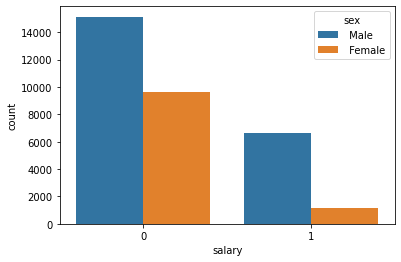

In [ ]:
ax = sns.countplot(data['salary'], hue=data['sex'])

ax = sns.boxenplot(data=data,x='age', y='workclass', hue='salary')

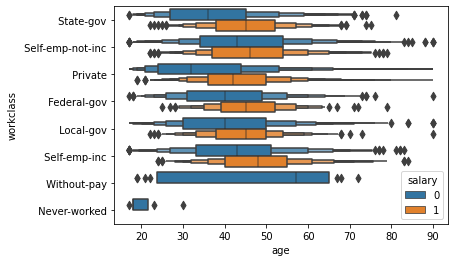

In [ ]:
ax = sns.boxenplot(data=data,x='age', y='workclass', hue='salary')

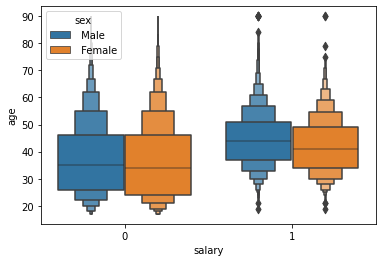

In [ ]:
ax = sns.boxenplot(data=data,x='salary', y='age', hue='sex')

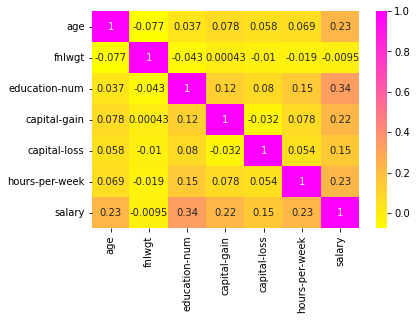

In [ ]:
sns.heatmap(data.corr(),annot= True, cmap='spring_r')

In [ ]:
fs = ['native-country', 'fnlwgt']
data.drop(fs, axis=1, inplace=True)
del fs # delete fs variable


In [ ]:
X =data.iloc[:, :-1]
y= data['salary']

In [ ]:
for i in data.select_dtypes('object').columns:
  X[i], _  = X[i].factorize()
  X.head()



In [ ]:
X.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,39,0,0,13,0,0,0,0,0,2174,0,40
1,50,1,0,13,1,1,1,0,0,0,0,13
2,38,2,1,9,2,2,0,0,0,0,0,40
3,53,2,2,7,1,2,1,1,0,0,0,40
4,28,2,0,13,1,3,2,1,1,0,0,40


In [ ]:
X_train,X_test,y_train,_y_test = train_test_split(X,y,test_size = 0.2, random_state=2)


In [ ]:
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)


In [ ]:
y_train = y_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)


In [ ]:
X.dtypes

age               int64
workclass         int64
education         int64
education-num     int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
dtype: object

In [ ]:
y.dtype

dtype('int64')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=100, criterion = "entropy")
rf.fit(X_train, y_train)
y_predrf = rf.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
acc1 = cross_val_score(rf, X_train, y_train, cv=10)
print(acc1.mean())

0.8516970200872127


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [ ]:
kn = KNeighborsClassifier(n_neighbors= 9)
kn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_pred = kn.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
acc2 = cross_val_score(kn, X_train, y_train, cv=10)
print(acc2.mean())

0.8379919568595191
